<a href="https://colab.research.google.com/github/SABBIRAHAMMED3/ML/blob/main/floodroutingat2sections.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

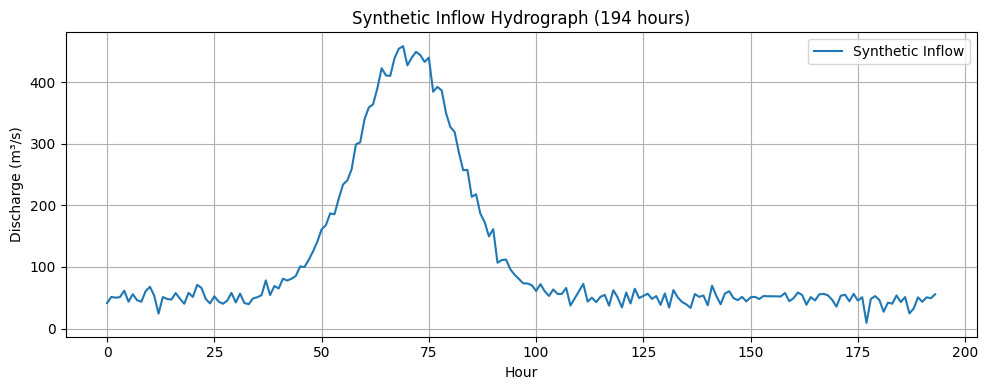

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parameters
total_hours = 194
peak_hour = 70
duration = 50  # duration of the rising + falling wave

# Generate time
t = np.arange(total_hours)

# Gaussian flood wave shape
inflow = 400 * np.exp(-((t - peak_hour) / (duration / 3))**2) + 50  # base flow = 50 m3/s

# Add some random noise
noise = np.random.normal(0, 10, size=total_hours)
inflow += noise

# Ensure no negative discharge
inflow[inflow < 0] = 0

# Save to CSV
inflow_df = pd.DataFrame({'Inflow': inflow})
inflow_df.to_csv("Inflow3.csv", index=False)

# Plot
plt.figure(figsize=(10, 4))
plt.plot(t, inflow, label="Synthetic Inflow")
plt.title("Synthetic Inflow Hydrograph (194 hours)")
plt.xlabel("Hour")
plt.ylabel("Discharge (m³/s)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load Data
inflow_df = pd.read_csv("Inflow.csv")
outflow_df = pd.read_csv("Outflow.csv")[['outflow 1', 'outflow 6']]

# Parameters
time_steps = 30

# Scale
scaler_in = MinMaxScaler()
scaler_out = MinMaxScaler()
inflow_scaled = scaler_in.fit_transform(inflow_df[['Inflow']])
outflow_scaled = scaler_out.fit_transform(outflow_df)

# Create sequences
def create_sequences(X, y, steps):
    Xs, ys = [], []
    for i in range(len(X) - steps):
        Xs.append(X[i:i+steps])
        ys.append(y[i+steps])
    return np.array(Xs), np.array(ys)

X, y = create_sequences(inflow_scaled, outflow_scaled, time_steps)

# Train-val-test split
n_train = int(0.6 * len(X))
n_val = int(0.2 * len(X))

X_train, y_train = X[:n_train], y[:n_train]
X_val, y_val     = X[n_train:n_train + n_val], y[n_train:n_train + n_val]
X_test, y_test   = X[n_train + n_val:], y[n_train + n_val:]

# Model
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(X.shape[1], 1)),
    Dropout(0.3),
    LSTM(64),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(2)  # Output: 2 downstream sections
])
model.compile(optimizer='adam', loss='mse')

# Train
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model.fit(X_train, y_train, validation_data=(X_val, y_val),
          epochs=100, batch_size=32, callbacks=[early_stop], verbose=1)

# Predict and evaluate
y_pred_scaled = model.predict(X_test)
y_pred = scaler_out.inverse_transform(y_pred_scaled)
y_test_actual = scaler_out.inverse_transform(y_test)

print("MSE:", mean_squared_error(y_test_actual, y_pred))
print("MAE:", mean_absolute_error(y_test_actual, y_pred))
print("R²:", r2_score(y_test_actual, y_pred, multioutput='uniform_average'))

# Plot results
for i in range(2):
    plt.figure(figsize=(10, 4))
    plt.plot(y_test_actual[:200, i], label='Actual')
    plt.plot(y_pred[:200, i], label='Predicted', linestyle='--')
    plt.title(f"Outflow at Section {i+1}")
    plt.xlabel("Time Step")
    plt.ylabel("Discharge")
    plt.legend()
    plt.tight_layout()
    plt.grid(True)
    plt.show()


IndexError: index 169 is out of bounds for axis 0 with size 169

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 342ms/step - loss: 0.2233 - val_loss: 0.1767
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 0.1739 - val_loss: 0.1236
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - loss: 0.0873 - val_loss: 0.0503
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - loss: 0.0592 - val_loss: 0.0555
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step - loss: 0.0603 - val_loss: 0.0874
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - loss: 0.0384 - val_loss: 0.1057
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 146ms/step - loss: 0.0385 - val_loss: 0.1227
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 0.0312 - val_loss: 0.1298
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 0.0217 - val_loss: 0.1214
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 0.0159 - val_loss: 0.1173
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 0.0124 - val_loss: 0.1283
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 0.0147 -

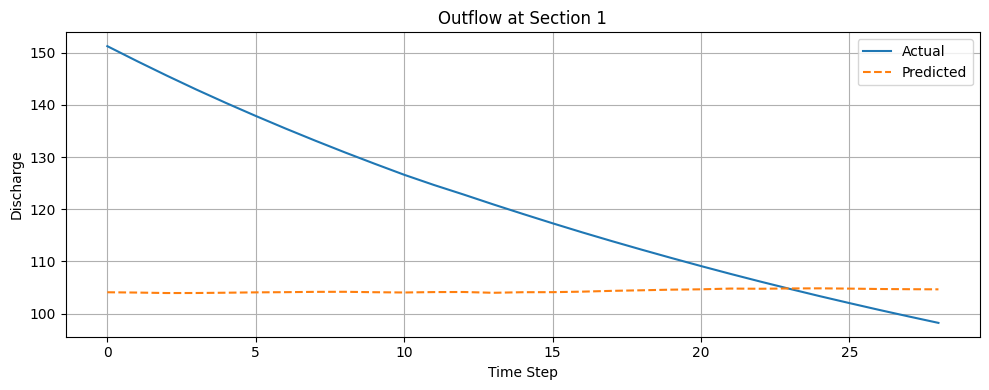

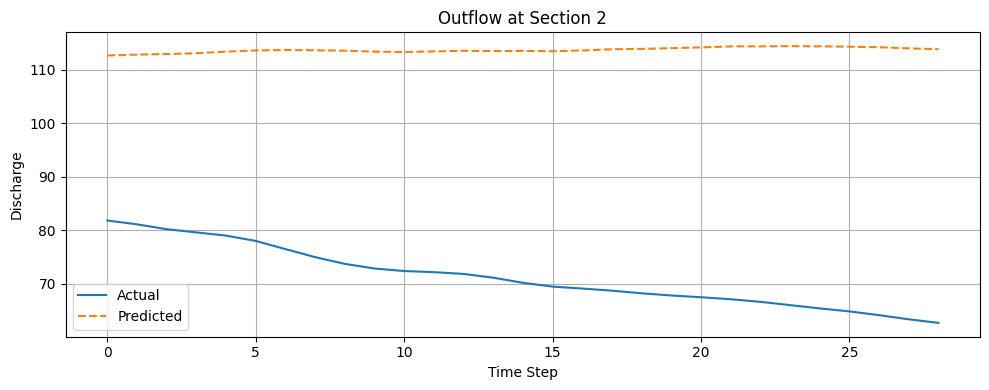

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load Data
inflow_df = pd.read_csv("Inflow.csv")
outflow_df = pd.read_csv("Outflow.csv")[['outflow 1', 'outflow 6']]

# Parameters
time_steps = 30

# Scale
scaler_in = MinMaxScaler()
scaler_out = MinMaxScaler()
inflow_scaled = scaler_in.fit_transform(inflow_df[['Inflow']])
outflow_scaled = scaler_out.fit_transform(outflow_df)

# Ensure both scaled arrays have the same length by truncating the longer one
min_len = min(len(inflow_scaled), len(outflow_scaled))
inflow_scaled = inflow_scaled[:min_len]
outflow_scaled = outflow_scaled[:min_len]


# Create sequences
def create_sequences(X, y, steps):
    Xs, ys = [], []
    for i in range(len(X) - steps):
        Xs.append(X[i:i+steps])
        ys.append(y[i+steps])
    return np.array(Xs), np.array(ys)

X, y = create_sequences(inflow_scaled, outflow_scaled, time_steps)

# Train-val-test split
n_train = int(0.6 * len(X))
n_val = int(0.2 * len(X))

X_train, y_train = X[:n_train], y[:n_train]
X_val, y_val     = X[n_train:n_train + n_val], y[n_train:n_train + n_val]
X_test, y_test   = X[n_train + n_val:], y[n_train + n_val:]

# Model
# Adjusted input shape to be compatible with the sequence data (steps, features)
# Since inflow is (steps, 1) and we are predicting (steps, 2), we need to clarify the input shape.
# Based on how X is created (sequences of 'inflow_scaled'), the input shape should be (time_steps, number of features in inflow).
# Number of features in inflow_scaled is 1.
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(X.shape[1], X.shape[2])), # Use X.shape[1] for steps and X.shape[2] for features
    Dropout(0.3),
    LSTM(64),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(y.shape[1])  # Output: number of features in y
])
model.compile(optimizer='adam', loss='mse')

# Train
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model.fit(X_train, y_train, validation_data=(X_val, y_val),
          epochs=100, batch_size=32, callbacks=[early_stop], verbose=1)

# Predict and evaluate
y_pred_scaled = model.predict(X_test)
y_pred = scaler_out.inverse_transform(y_pred_scaled)
y_test_actual = scaler_out.inverse_transform(y_test)

print("MSE:", mean_squared_error(y_test_actual, y_pred))
print("MAE:", mean_absolute_error(y_test_actual, y_pred))
print("R²:", r2_score(y_test_actual, y_pred, multioutput='uniform_average'))

# Plot results
# Loop up to the number of output features
for i in range(y_test_actual.shape[1]):
    plt.figure(figsize=(10, 4))
    # Plotting up to the length of the test set
    plt.plot(y_test_actual[:, i], label='Actual')
    plt.plot(y_pred[:, i], label='Predicted', linestyle='--')
    plt.title(f"Outflow at Section {i+1}")
    plt.xlabel("Time Step")
    plt.ylabel("Discharge")
    plt.legend()
    plt.tight_layout()
    plt.grid(True)
    plt.show()

In [ ]:
X[0]

array([[0.07698408],
       [0.06730378],
       [0.04012018],
       [0.02220201],
       [0.02914052],
       [0.05781672],
       [0.03285252],
       [0.06085686],
       [0.03784132],
       [0.04570178],
       [0.06092396],
       [0.        ],
       [0.04944968],
       [0.04569448],
       [0.04932695],
       [0.09376988],
       [0.05594616],
       [0.0745656 ],
       [0.00362652],
       [0.07409458],
       [0.06391968],
       [0.03421406],
       [0.03544196],
       [0.06083266],
       [0.02144288],
       [0.09745537],
       [0.0301553 ],
       [0.04870141],
       [0.0533753 ],
       [0.09434549]])

In [ ]:
y[0]

array([0.01430643, 0.00118756])

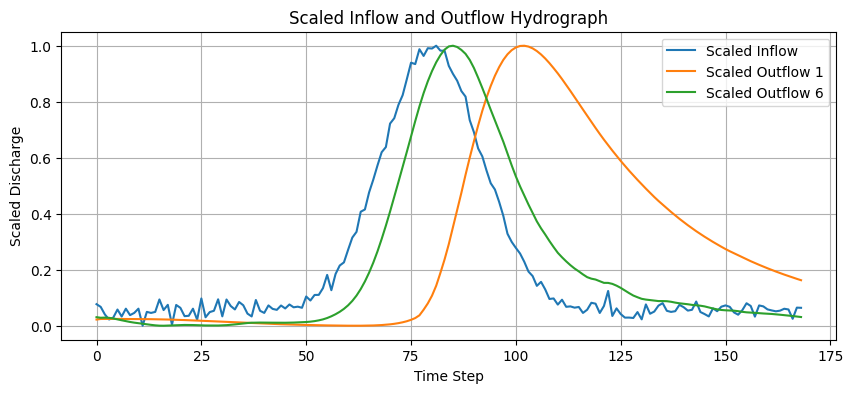

In [ ]:

plt.figure(figsize=(10, 4))
# Plotting the first feature of inflow_scaled (it only has one feature)
plt.plot(inflow_scaled[:, 0], label='Scaled Inflow')
# Plotting one of the outflow features, e.g., the first one
plt.plot(outflow_scaled[:, 0], label='Scaled Outflow 1')
# You could plot the second outflow feature as well
plt.plot(outflow_scaled[:, 1], label='Scaled Outflow 6')


plt.xlabel('Time Step')
plt.ylabel('Scaled Discharge')
plt.title('Scaled Inflow and Outflow Hydrograph')
plt.legend()
plt.grid(True)
plt.show()



In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt


In [3]:
# Load Data
inflow_df = pd.read_csv("Inflow.csv")
outflow_df = pd.read_csv("Outflow.csv")[['outflow 1', 'outflow 6']]


In [4]:
outflow_df.shape

(169, 2)

In [5]:
inflow_df.shape

(194, 1)

In [6]:
# Parameters
time_steps = 30

# Scale
scaler_in = MinMaxScaler()
scaler_out = MinMaxScaler()
inflow_scaled = scaler_in.fit_transform(inflow_df[['Inflow']])
outflow_scaled = scaler_out.fit_transform(outflow_df)

# same length arrays
min_len = min(len(inflow_scaled), len(outflow_scaled))
inflow_scaled = inflow_scaled[:min_len]
outflow_scaled = outflow_scaled[:min_len]

In [7]:
inflow_scaled.shape

(169, 1)

In [8]:
outflow_scaled.shape

(169, 2)

In [9]:
# Create sequences
def create_sequences(X, y, steps):
    Xs, ys = [], []
    for i in range(len(X) - steps):
        Xs.append(X[i:i+steps])
        ys.append(y[i+steps])
    return np.array(Xs), np.array(ys)

X, y = create_sequences(inflow_scaled, outflow_scaled, time_steps)


In [10]:
X.shape

(139, 30, 1)

In [11]:
y.shape

(139, 2)

In [12]:
X[0]

array([[0.07698408],
       [0.06730378],
       [0.04012018],
       [0.02220201],
       [0.02914052],
       [0.05781672],
       [0.03285252],
       [0.06085686],
       [0.03784132],
       [0.04570178],
       [0.06092396],
       [0.        ],
       [0.04944968],
       [0.04569448],
       [0.04932695],
       [0.09376988],
       [0.05594616],
       [0.0745656 ],
       [0.00362652],
       [0.07409458],
       [0.06391968],
       [0.03421406],
       [0.03544196],
       [0.06083266],
       [0.02144288],
       [0.09745537],
       [0.0301553 ],
       [0.04870141],
       [0.0533753 ],
       [0.09434549]])

In [13]:
y[0]

array([0.01430643, 0.00118756])

In [14]:
inflow_scaled[0:30]

array([[0.07698408],
       [0.06730378],
       [0.04012018],
       [0.02220201],
       [0.02914052],
       [0.05781672],
       [0.03285252],
       [0.06085686],
       [0.03784132],
       [0.04570178],
       [0.06092396],
       [0.        ],
       [0.04944968],
       [0.04569448],
       [0.04932695],
       [0.09376988],
       [0.05594616],
       [0.0745656 ],
       [0.00362652],
       [0.07409458],
       [0.06391968],
       [0.03421406],
       [0.03544196],
       [0.06083266],
       [0.02144288],
       [0.09745537],
       [0.0301553 ],
       [0.04870141],
       [0.0533753 ],
       [0.09434549]])

In [15]:
outflow_scaled[30]

array([0.01430643, 0.00118756])

In [16]:
# Load Data
inflow_df = pd.read_csv("Inflow2.csv")
outflow_df = pd.read_csv("outflow2.csv")[['outflow1', 'outflow6']]

# Parameters
time_steps = 30

# Scale
scaler_in = MinMaxScaler()
scaler_out = MinMaxScaler()
inflow_scaled = scaler_in.fit_transform(inflow_df[['Inflow']])
outflow_scaled = scaler_out.fit_transform(outflow_df)

# Ensure both scaled arrays have the same length by truncating the longer one
min_len = min(len(inflow_scaled), len(outflow_scaled))
inflow_scaled = inflow_scaled[:min_len]
outflow_scaled = outflow_scaled[:min_len]


# Create sequences
def create_sequences(X, y, steps):
    Xs, ys = [], []
    for i in range(len(X) - steps):
        Xs.append(X[i:i+steps])
        ys.append(y[i+steps])
    return np.array(Xs), np.array(ys)

X_val, y_val = create_sequences(inflow_scaled, outflow_scaled, time_steps)

In [17]:
# Train-val-test split
n_train = int(len(X))
n_val = int(len(X))

X_train, y_train = X[:n_train], y[:n_train]


In [18]:
X_val.shape

(139, 30, 1)

In [19]:
X_train.shape

(139, 30, 1)

In [20]:
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(X.shape[1], X.shape[2])), # Use X.shape[1] for steps and X.shape[2] for features
    Dropout(0.3),
    LSTM(64),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(y.shape[1])  # Output: number of features in y
])
model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
# Train
early_stop = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)
model.fit(X_train, y_train, validation_data=(X_val, y_val),
          epochs=100, batch_size=32, callbacks=[early_stop], verbose=1)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 354ms/step - loss: 0.2053 - val_loss: 0.1018
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - loss: 0.0936 - val_loss: 0.0634
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 0.0645 - val_loss: 0.0558
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - loss: 0.0566 - val_loss: 0.0374
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - loss: 0.0379 - val_loss: 0.0283
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.0378 - val_loss: 0.0232
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.0251 - val_loss: 0.0144
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.0197 - val_loss: 0.0132
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - loss: 0.0203 - val_loss: 0.0110
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 0.0162 - val_loss: 0.0114
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 0.0153 - val_loss: 0.0118
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.0135 - val_l

In [40]:
# Load Data
inflow_df = pd.read_csv("Inflow1.csv")
outflow_df = pd.read_csv("outflow1.csv")[['outflow1', 'outflow6']]

# Parameters
time_steps = 30

# Scale
scaler_in = MinMaxScaler()
scaler_out = MinMaxScaler()
inflow_scaled = scaler_in.fit_transform(inflow_df[['Inflow']])
outflow_scaled = scaler_out.fit_transform(outflow_df)

# Ensure both scaled arrays have the same length by truncating the longer one
min_len = min(len(inflow_scaled), len(outflow_scaled))
inflow_scaled = inflow_scaled[:min_len]
outflow_scaled = outflow_scaled[:min_len]


# Create sequences
def create_sequences(X, y, steps):
    Xs, ys = [], []
    for i in range(len(X) - steps):
        Xs.append(X[i:i+steps])
        ys.append(y[i+steps])
    return np.array(Xs), np.array(ys)

X_test, y_test = create_sequences(inflow_scaled, outflow_scaled, time_steps)

In [44]:
# Predict and evaluate
y_pred_scaled = model.predict(X_test)
y_pred = scaler_out.inverse_transform(y_pred_scaled)
y_test_actual = scaler_out.inverse_transform(y_test)



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


MSE: 338.70220906302507
MAE: 15.062979891385963
R²: 0.9634993950250013


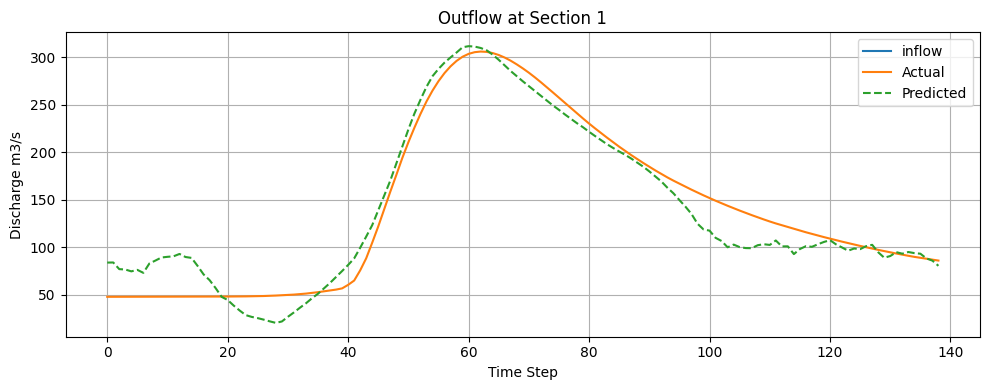

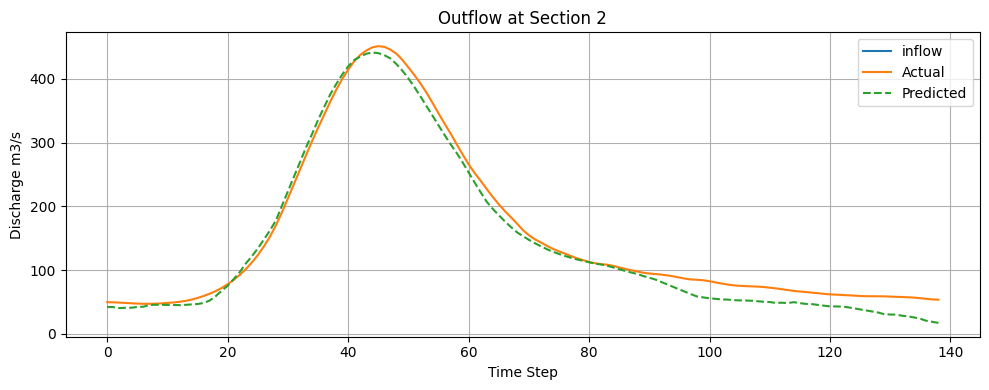

In [47]:
print("MSE:", mean_squared_error(y_test_actual, y_pred))
print("MAE:", mean_absolute_error(y_test_actual, y_pred))
print("R²:", r2_score(y_test_actual, y_pred, multioutput='uniform_average'))

# Plot results
# Loop up to the number of output features
for i in range(y_test_actual.shape[1]):
    plt.figure(figsize=(10, 4))
    # Plotting up to the length of the test set

    plt.plot(y_test_actual[:, i], label='Actual')
    plt.plot(y_pred[:, i], label='Predicted', linestyle='--')
    plt.title(f"Outflow at Section {i+1}")
    plt.xlabel("Time Step")
    plt.ylabel("Discharge m3/s")
    plt.legend()
    plt.tight_layout()
    plt.grid(True)
    plt.show()

In [48]:
# Load Data
inflow_df = pd.read_csv("Inflow2.csv")
outflow_df = pd.read_csv("outflow2.csv")[['outflow1', 'outflow6']]

# Parameters
time_steps = 30

# Scale
scaler_in = MinMaxScaler()
scaler_out = MinMaxScaler()
inflow_scaled = scaler_in.fit_transform(inflow_df[['Inflow']])
outflow_scaled = scaler_out.fit_transform(outflow_df)

# Ensure both scaled arrays have the same length by truncating the longer one
min_len = min(len(inflow_scaled), len(outflow_scaled))
inflow_scaled = inflow_scaled[:min_len]
outflow_scaled = outflow_scaled[:min_len]


# Create sequences
def create_sequences(X, y, steps):
    Xs, ys = [], []
    for i in range(len(X) - steps):
        Xs.append(X[i:i+steps])
        ys.append(y[i+steps])
    return np.array(Xs), np.array(ys)

X_test, y_test = create_sequences(inflow_scaled, outflow_scaled, time_steps)

In [49]:
# Predict and evaluate
y_pred_scaled = model.predict(X_test)
y_pred = scaler_out.inverse_transform(y_pred_scaled)
y_test_actual = scaler_out.inverse_transform(y_test)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


MSE: 810.1441820650407
MAE: 22.26928055180062
R²: 0.9286896198542598


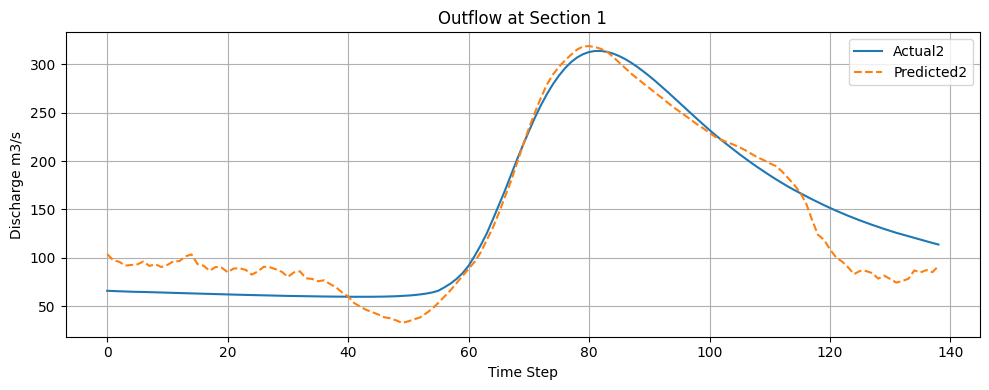

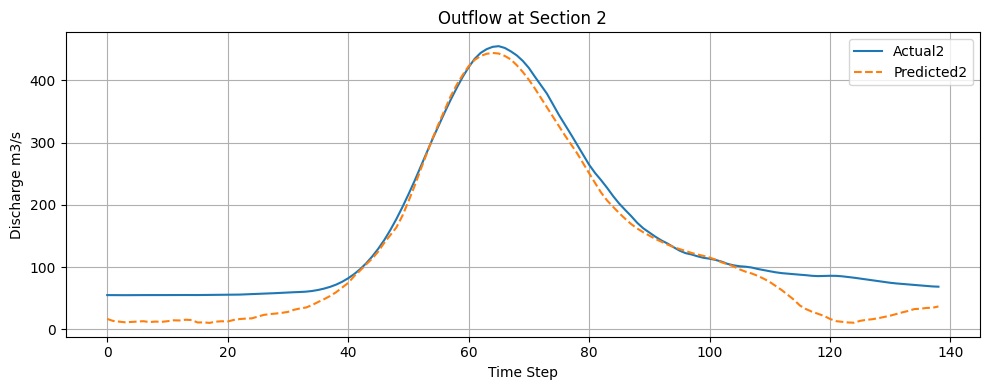

In [50]:
print("MSE:", mean_squared_error(y_test_actual, y_pred))
print("MAE:", mean_absolute_error(y_test_actual, y_pred))
print("R²:", r2_score(y_test_actual, y_pred, multioutput='uniform_average'))

# Plot results
# Loop up to the number of output features
for i in range(y_test_actual.shape[1]):
    plt.figure(figsize=(10, 4))
    # Plotting up to the length of the test set
    plt.plot(y_test_actual[:, i], label='Actual2')
    plt.plot(y_pred[:, i], label='Predicted2', linestyle='--')
    plt.title(f"Outflow at Section {i+1}")
    plt.xlabel("Time Step")
    plt.ylabel("Discharge m3/s")
    plt.legend()
    plt.tight_layout()
    plt.grid(True)
    plt.show()